# MiniProjeto 2 - Convolutional Neural Networks - Redes Neurais

## Reconhecimento de Dígitos com CNN

## Grupo: Josenildo Vicente de Araújo (jva@cin.ufpe.br), Lucas Thierry Chaves Muniz (ltcm@cin.ufpe.br), Nicholas Henrique Justino Ferreira (nhjf@cin.ufpe.br), Renato Joaquim Miranda Ferreira (rjmf@cin.ufpe.br)

O seguinte MiniProjeto tem como objetivo praticar os conceitos e teorias aprendidas na disciplina de Redes Neurais a respeito do funcionamento do modelo de Redes Neurais Convolucionais. De maneira a variar os parâmetros do modelo treinado e observar seus resultados. A rede utilizada em questão, tem como função fazer o reconhecimento de dígitos escritos manualmente por 250 pessoas, entre as quais eram estudantes do Ensino Médio e funcionários do Departamento do Censo dos Estados Unidos. O conjunto desses dígitos está reunido no _dataset_ MNIST, que possuí 60000 imagens para treinamento do modelo da rede neural e 10000 imagens para teste do modelo da rede neural. Cada uma dessas imagens são formadas por 784 _pixels_ (28x28) em uma escala da cor cinza.


Começamos pela importação do pacote das bibliotecas do keras para construção do modelo, importação do dataset. O matplotlib será a biblioteca gráfica e será usada quando for pertinente

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Importação do dataset e separação entre os conjuntos de teste e treinamento

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

explorando o dataset

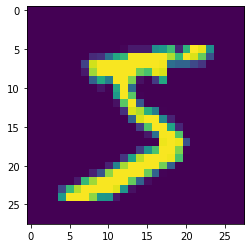

In [11]:
plt.imshow(X_train[0])

Reshape para treinamento do modelo do keras

In [12]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [13]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Criação do modelo Sequencial, escolhemos o sequencial pois permite a criação do modelo layer a layer. 

Utilizamos 3 layers diferentes para lidar com o dataset, as 2 primeiras layers convolucionais de uma matriz com 2 dimensões, uma vez que o nosso dataset está de acordo com as 2 dimensões a serem vistas e utilizadas, bem como uma 'liga' representada pelo Flatten que serve para ligar as matrizes convolucionais com as camadas mais densas do modelo.

As camadas convolucionais são representadas pelos tamanhos 64 e 32, que são os números de nodes em cada layer, esse parâmetros podem ser ajustados dependendo do modelo.

As funções de ativação 'relu' e 'softmax' serão utilizadas em suas respectivas camadas.

A camada 'Dense' diz respeito a geração de outputs muito utilizadas nas mais diversas redes neurais, ela receberá 10 nodes, que representam o dígitos de 0-9 do nosso dataset. 

O modelo faz a predição baseado em qual foi o node que teve a maior probabilidade para uma dada amostra, em outras palavras, dada uma imagem X, será feita uma lista de probabilidades para tentar adivinhar qual foi o dígito fornecido.

In [14]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [15]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 174s 92ms/step - loss: 0.2702 - accuracy: 0.9496 - val_loss: 0.0852 - val_accuracy: 0.9741
Epoch 2/3
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.0704 - val_accuracy: 0.9801
Epoch 3/3
1875/1875 [==============================] - 175s 94ms/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0892 - val_accuracy: 0.9727


Após o treinamento de 3 épocas com o nosso modelo em mãos, foi possível obter uma acurácia média para o nosso dataset de 97%

In [28]:
predictions = model.predict(X_test[:5])
predictions

array([[6.03584510e-07, 7.90626675e-10, 2.98903910e-06, 4.20431461e-05,
        3.66446151e-10, 9.44575640e-10, 4.02875407e-11, 9.99949932e-01,
        3.72549653e-06, 6.56003863e-07],
       [1.58087369e-05, 1.55686752e-09, 9.99980927e-01, 4.11141832e-09,
        5.42346983e-13, 1.02984635e-11, 3.11281792e-06, 7.00322482e-12,
        6.34029647e-08, 1.61906797e-13],
       [6.02659657e-06, 9.99560416e-01, 1.15842322e-05, 2.67341397e-06,
        2.95468326e-05, 2.36362266e-05, 3.35423579e-06, 4.58563482e-05,
        3.16559424e-04, 4.13270101e-07],
       [9.99999642e-01, 3.98714308e-12, 2.10682369e-08, 7.21529564e-12,
        2.21037685e-11, 9.41806206e-08, 1.25352514e-07, 1.73644876e-10,
        1.25931379e-07, 1.26422135e-08],
       [3.52681468e-07, 2.03445774e-10, 7.05754455e-10, 4.34059212e-11,
        9.99911070e-01, 1.87147978e-10, 1.07158982e-09, 3.23194971e-10,
        4.35994434e-06, 8.42271256e-05]], dtype=float32)

In [27]:
y_test[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)